## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import re
import sklearn

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
print('The shape of training data is: ', df_train.shape)
print('The shape of test data is: ', df_test.shape)

The shape of training data is:  (31962, 3)
The shape of test data is:  (17197, 2)


## Cleaning & Preprocessing the data

#### 1. Defining a function to remove hashtags, '@' sign and lower case the tweets

In [5]:
def clean_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [6]:
df_train['new_tweets'] = df_train['tweet'].apply(clean_tweet)
df_train.head(10)

,id,label,tweet,new_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr8


#### 2. Appending a column signifying the length of tweet

In [7]:
df_train['length'] = df_train['new_tweets'].apply(len)
df_train.head()

,id,label,tweet,new_tweets,length
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,91
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...,103
2,3,0,bihday your majesty,bihday your majesty,19
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur,45
4,5,0,factsguide: society now #motivation,factsguide society now motivation,33


#### 3. Having a look at frequency distribution of classes

0    29720
1     2242
Name: label, dtype: int64


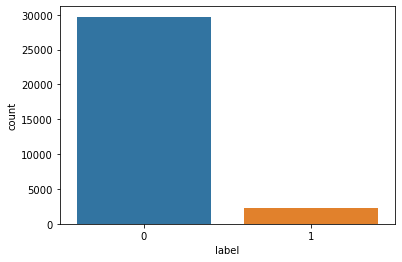

In [8]:
print(df_train['label'].value_counts())
fig = sns.countplot(x= 'label',data = df_train)

In [9]:
df_train.drop('id',inplace=True,axis=1)
df_train.drop('tweet',inplace=True,axis=1)
df_train.head()

,label,new_tweets,length
0,0,when a father is dysfunctional and is so selfi...,91
1,0,thanks for lyft credit i can t use cause they ...,103
2,0,bihday your majesty,19
3,0,model i love u take with u all the time in ur,45
4,0,factsguide society now motivation,33


#### 5. Splitting the data and removing stopwords.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train["new_tweets"], df_train["label"], test_size = 0.2, random_state = 0)


from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)
x_test_counts = count_vect.transform(x_test)
x_train_counts

<25569x33693 sparse matrix of type '<class 'numpy.int64'>'
	with 179239 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_tfidf = transformer.fit_transform(x_train_counts)
x_test_tfidf = transformer.transform(x_test_counts)

## Fitting the Model

#### 1. Using Random Forest Ensemble Technique.

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[5964,   21],
       [ 192,  216]])

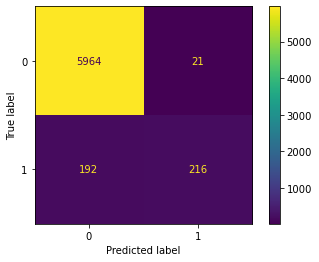

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test_tfidf, y_test)  

In [19]:
#Generating Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test_tfidf), digits=4))

              precision    recall  f1-score   support

           0     0.9688    0.9965    0.9825      5985
           1     0.9114    0.5294    0.6698       408

    accuracy                         0.9667      6393
   macro avg     0.9401    0.7630    0.8261      6393
weighted avg     0.9651    0.9667    0.9625      6393



#### 2. Using Support Vector Machine (SVM) Algorithm

In [20]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train_tfidf,y_train)

predictions_svm = clf.predict(x_test_tfidf)

confusion_matrix(y_test,predictions_svm)

array([[5943,   42],
       [ 164,  244]])

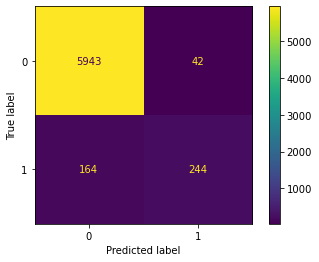

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test_tfidf, y_test)  

In [22]:
#Generating Classification Report
print(classification_report(y_test, clf.predict(x_test_tfidf), digits=4))

              precision    recall  f1-score   support

           0     0.9731    0.9930    0.9830      5985
           1     0.8531    0.5980    0.7032       408

    accuracy                         0.9678      6393
   macro avg     0.9131    0.7955    0.8431      6393
weighted avg     0.9655    0.9678    0.9651      6393

